<a href="https://colab.research.google.com/github/DebadityaShome/Deep-learning-practice/blob/main/PyTorch/LeNet_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import packages
import os
import torch.nn as nn

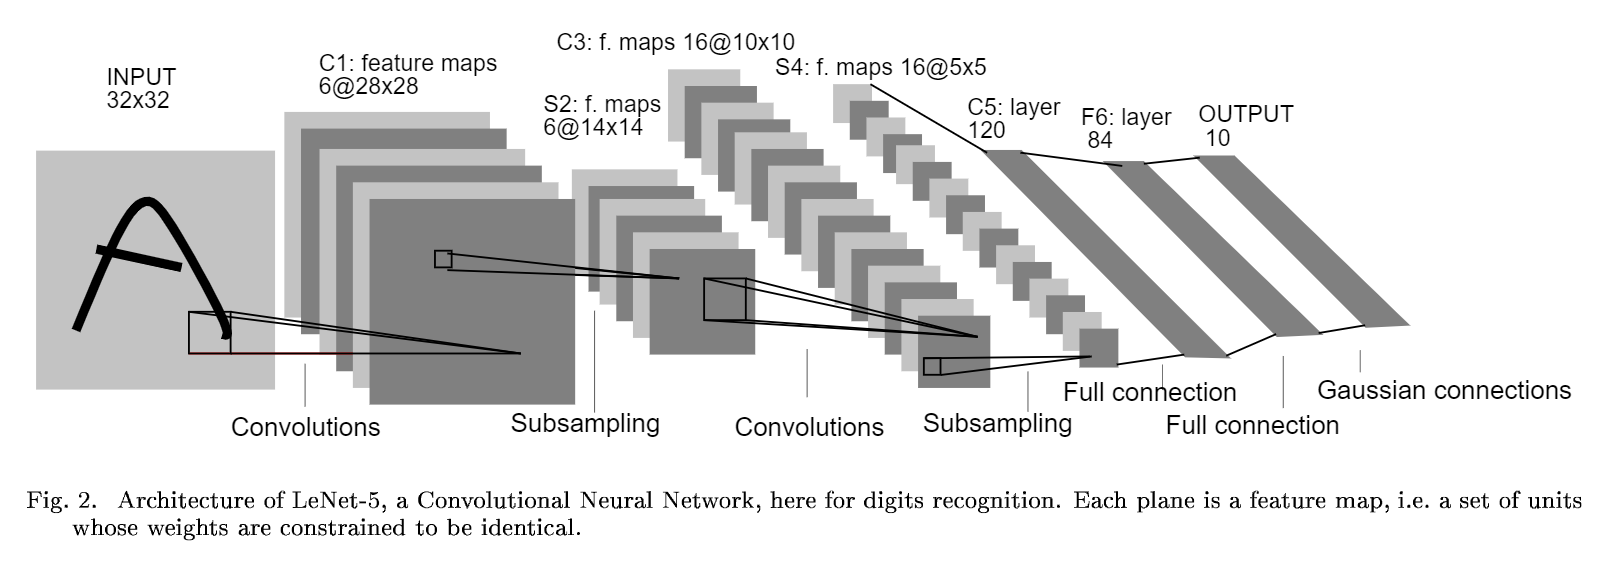

In [5]:
from IPython.display import Image
Image(filename="/content/Capture.PNG")

In [6]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.relu = nn.ReLU()   ## Original paper had Tan(h) as activation instead of ReLU
        self.pool = nn.AvgPool2d(kernel_size=(2,2), stride=(2,2), padding=(0,0))
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), stride=(1,1), padding=(0,0))
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=(1,1), padding=(0,0))
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5,5), stride=(1,1), padding=(0,0))
        self.linear1 = nn.Linear(120, 84)
        self.linear2 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = x.reshape(x.shape[0],-1)
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [7]:
x = torch.randn(64, 1, 32, 32)
model = LeNet()
print(model(x).shape)

torch.Size([64, 10])
